In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN()
chemistry = pybamm.parameter_sets.ORegan2022_adjusted
param = pybamm.ParameterValues(chemistry=chemistry)
param.update({"Ambient temperature [K]": 283.15})
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})
exp = pybamm.Experiment(["Discharge at 1C until 2.5 V"])

pts400 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 400,  # negative particle
    "r_p": 400,  # positive particle
}

sim400 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts400)
solution400 = sim400.solve(calc_esoh=False)

pts200 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 200,  # negative particle
    "r_p": 200,  # positive particle
}

sim200 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts200)
solution200 = sim200.solve(calc_esoh=False)

pts150 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 150,  # negative particle
    "r_p": 150,  # positive particle
}

sim150 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts150)
solution150 = sim150.solve(calc_esoh=False)

pts120 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 120,  # negative particle
    "r_p": 120,  # positive particle
}

sim120 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts120)
solution120 = sim120.solve(calc_esoh=False)

pts100 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 100,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts60 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 60,  # positive particle
}

sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts60)
solution60 = sim60.solve(calc_esoh=False)

pts30 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 30,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

In [ ]:
t400 = solution400["Time [s]"].entries
print(f"With 400 points, discharge lasts {np.max(t400)} seconds.")
t200 = solution200["Time [s]"].entries
print(f"With 200 points, discharge lasts {np.max(t200)} seconds.")
t150 = solution150["Time [s]"].entries
print(f"With 150 points, discharge lasts {np.max(t150)} seconds.")
t120 = solution120["Time [s]"].entries
print(f"With 120 points, discharge lasts {np.max(t120)} seconds.")
t100 = solution100["Time [s]"].entries
print(f"With 100 points, discharge lasts {np.max(t100)} seconds.")

In [3]:
Q400 = solution400["Discharge capacity [A.h]"].entries
V400 = solution400["Terminal voltage [V]"].entries
Q200 = solution200["Discharge capacity [A.h]"].entries
V200 = solution200["Terminal voltage [V]"].entries
Q150 = solution150["Discharge capacity [A.h]"].entries
V150 = solution150["Terminal voltage [V]"].entries
Q120 = solution120["Discharge capacity [A.h]"].entries
V120 = solution120["Terminal voltage [V]"].entries
Q100 = solution100["Discharge capacity [A.h]"].entries
V100 = solution100["Terminal voltage [V]"].entries
Q60 = solution60["Discharge capacity [A.h]"].entries
V60 = solution60["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
V30 = solution30["Terminal voltage [V]"].entries
print(f"With 400 points, discharge capacity is {np.max(Q400)} Ah.")
print(f"With 200 points, discharge capacity is {np.max(Q200)} Ah.")
print(f"With 150 points, discharge capacity is {np.max(Q150)} Ah.")
print(f"With 120 points, discharge capacity is {np.max(Q120)} Ah.")
print(f"With 100 points, discharge capacity is {np.max(Q100)} Ah.")
print(f"With 60 points, discharge capacity is {np.max(Q60)} Ah.")
print(f"With 30 points, discharge capacity is {np.max(Q30)} Ah.")

With 400 points, discharge capacity is 4.3189885814193705 Ah.
With 200 points, discharge capacity is 4.318748664243411 Ah.
With 150 points, discharge capacity is 4.318391329069712 Ah.
With 120 points, discharge capacity is 4.317760813691605 Ah.
With 100 points, discharge capacity is 4.316736042060373 Ah.
With 60 points, discharge capacity is 4.305833434297517 Ah.
With 30 points, discharge capacity is 4.107809785598938 Ah.


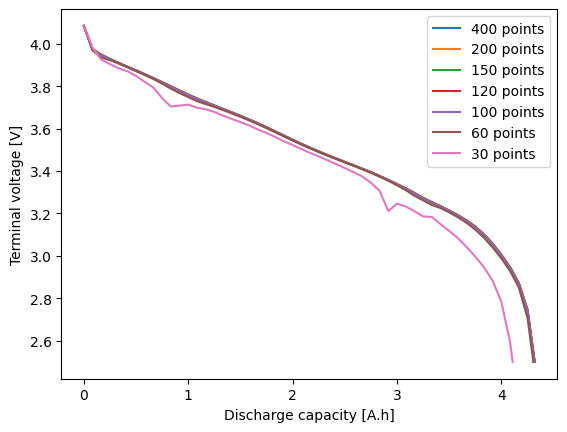

In [4]:
fig, ax = plt.subplots()
ax.plot(Q400,V400,label="400 points")
ax.plot(Q200,V200,label="200 points")
ax.plot(Q150,V150,label="150 points")
ax.plot(Q120,V120,label="120 points")
ax.plot(Q100,V100,label="100 points")
ax.plot(Q60,V60,label="60 points")
ax.plot(Q30,V30,label="30 points")
ax.set_xlabel("Discharge capacity [A.h]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/uniform_1C_discharge_283K.pdf")
plt.show()

In [ ]:
(3.0585-3.0167)/3.0639